# Creando nuestro propio KNN

A continuación crearemos nuestro propio algoritmo de KNN aprovechando los conocimientos de matemáticas y estadística que hemos ido viendo a lo largo del curso.

Como sabemos, el algoritmo se basa en la distancia (euclídea), concepto que ya hemos visto anteriormente con las técnicas de clustering.

El paquete `Counter` será el que emplearemos para obtener el sistema de votos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter

Crearemos un data set (que ya hemos usado anteriormente) que estará basado en un diccionario de pares de coordenadas y dos columnas basadas en colores: `k` (negro) y `r` (rojo).

También crearemos un nuevo punto a clasificar.

In [2]:
dataset = {
    'k':[[1,2],[2,3],[3,1]],
    'r':[[6,5],[7,7],[8,6]]
}
new_point = [5,7]

Ahora visualizaremos los datos con un scatterplot de una manera un poco diferente a la habitual, a través de un bucle que dibuje los puntos uno a uno.

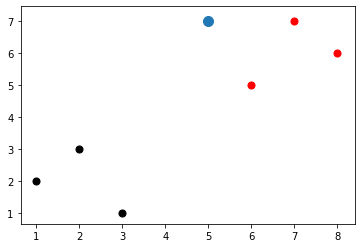

In [3]:
[[plt.scatter(ii[0],ii[1],s=50,color=i) for ii in dataset[i]] for i in dataset]
# pintamos el dato a predecir en otro formato
plt.scatter(new_point[0],new_point[1], s=100)

Definimos la funció para el KNN.

Para ser capaces de comprar cada uno de los grupos que existan en el conjunto de datos conra lo que quiero clasificar el procedimiento consistirá en crear una lista, dentro de otra lista que contendrá las distancias y la clase para cada uno de los puntos del data set (rojo y negro en el ejemplo).

La lista se decidirá tomando los 3 primeros elementos de la ista de votos ordenada (por distancia).

In [34]:
def k_nearest_neighbors(data, predict, k=3, verbose=False):
    
    # aseguramos que k sea menor que la longitud de los datos
    if len(data) >= k:
        warnings.warn("K es menor que el número total de elementos a votar!!")
    
    # lista de distancias
    distances = []
    for group in data:
        for feature in data[group]:
            
            # calculamos distancia euclídea
            # d = sqrt((feature[0]-predict[0])**2-(feature[1]-predict[1])**2)
            # generalizado para más de 2 variables con numpy
            # d = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
            # optimizado con la normalizqcion algebraica
            d = np.linalg.norm(np.array(feature)-np.array(predict))
            
            distances.append([d,group])
    
    if verbose:
        print(distances)
    
    # lista de clases
    votes = [i[1] for i in sorted(distances)[:k]] # sorted ordena por la primera columna
    if verbose:
        print(votes)
    
    vote_result = Counter(votes).most_common(1)
    if verbose:
        print(vote_result)
    
    return vote_result[0][0] # [('k',2),('r',1)]

In [36]:
result = k_nearest_neighbors(dataset, new_point, verbose=True)
result

[[6.4031242374328485, 'k'], [5.0, 'k'], [6.324555320336759, 'k'], [2.23606797749979, 'r'], [2.0, 'r'], [3.1622776601683795, 'r']]
['r', 'r', 'r']
[('r', 3)]


'r'

Vemos que nos devuelve la matriz de distancias, como le hemos pedido, y cual es el proceso que sigue el algoritmo para determinar el grupo del nuevo punto mediante votación. 

Podemos verlo gráficamente de la siguiente manera.

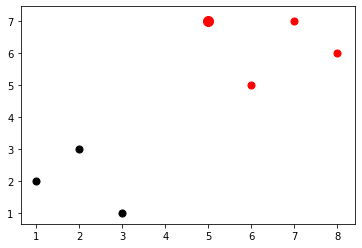

In [8]:
[[plt.scatter(ii[0],ii[1],s=50,color=i) for ii in dataset[i]] for i in dataset]
# pintamos el dato a predecir con el resultado
plt.scatter(new_point[0],new_point[1], s=100, color=result)

## Aplicar nuestro KNN al data Set de Cancer

Aplicaremos el algoritmo desarrollado líneas arriba en contraste con el algoritmo de `sklearn` para evaluar sus eficacias.

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("../../../GitHub/python-ml-course/datasets/cancer/breast-cancer-wisconsin.data.txt", header=None)
df.replace('?',-999999, inplace=True)
df.columns = ['name','V1','V2','V3','V4','V5','V6','V7','V8','V9','class']

df.drop(['name'],1, inplace=True) # inplace reasigna sobre el df
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Pasamos los datos a un formato que se trage nuestro KNN.

In [11]:
full_data = df.astype(float).values.tolist()
full_data

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1

Separamos los datos en los conjuntos de entrenamiento y validación

In [24]:
import random
random.shuffle(full_data)

In [25]:
test_size = 0.2

In [26]:
train_set = {2:[],4:[]}
test_set = {2:[],4:[]}

In [30]:
# el set de entrenamiento lo tomamos desde el principio hasta el último 20%
train_data = full_data[:-int(test_size*len(full_data))]
# el set de validación desde el último 20% en adelante
test_data = full_data[-int(test_size*len(full_data)):]

In [31]:
# apendizamos los datos a los diccionarios para que nuestro algoritmo se lo coma
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

Vemos que ahora tenemos los datos tal como los quiere nuestro algoritmo: dos arrays de datos separados por grupo.

In [33]:
train_set

{2: [[4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 5.0, 1.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0],
  [5.0, 3.0, 4.0, 1.0, 4.0, 1.0, 3.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0,

Ahora realizamos la clasificación de los datos de validación para comprobar la eficacia del modelo.

Utilizaremos un `k = 5`, valor que usa por defecto este modelo en python.

In [37]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k = 5)
        if group == vote:
            correct +=1
        total +=1
print("Eficacia del KNN = ", correct/total)

Eficacia del KNN =  0.9737470167064439


In [ ]:
Y = df['class']
X = df[['V1','V2','V3','V4','V5','V6','V7','V8','V9']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,Y_train)